In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Importing libraries
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import re

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:

messages = pd.read_csv("/content/spamhamdata.csv",sep='\t',names=["label","text"])


In [ ]:
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [ ]:
len(corpus)

5572

**Bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

In [ ]:
x.shape

(5572, 2500)

In [ ]:
y=pd.get_dummies(messages['label'])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [ ]:
messages['transformed_text'] = messages['text'].apply(transform_text)

In [ ]:
messages.sample(3)

,label,text,transformed_text
3091,0,Am going to take bath ill place the key in win...,go take bath ill place key window
5502,0,Apo all other are mokka players only,apo mokka player
57,0,"Sorry, I'll call later in meeting.",sorri call later meet


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
messages['label'] = encoder.fit_transform(messages['label'])

In [ ]:
messages.sample(3)

,label,text,transformed_text
4818,0,Me too. Mark is taking forever to pick up my p...,mark take forev pick prescript pain come back
817,0,"He has lots of used ones babe, but the model d...",lot use one babe model help youi bring match
5212,0,K.k.how is your business now?,busi


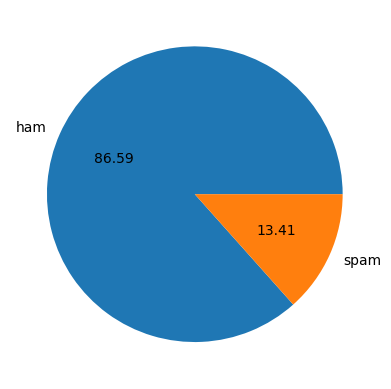

In [ ]:
plt.pie(messages['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

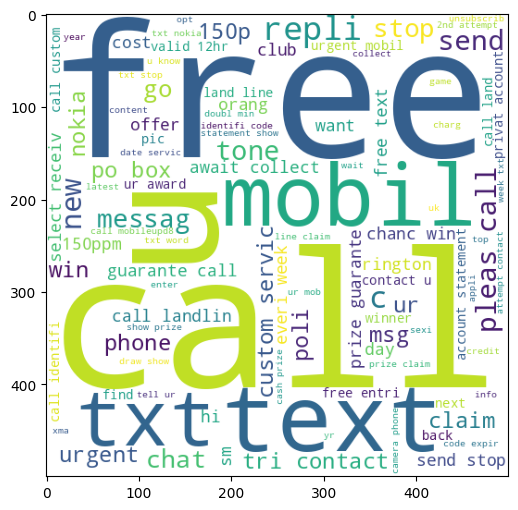

In [ ]:
import matplotlib.pyplot as plt
spam_wc = wc.generate(messages[messages['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

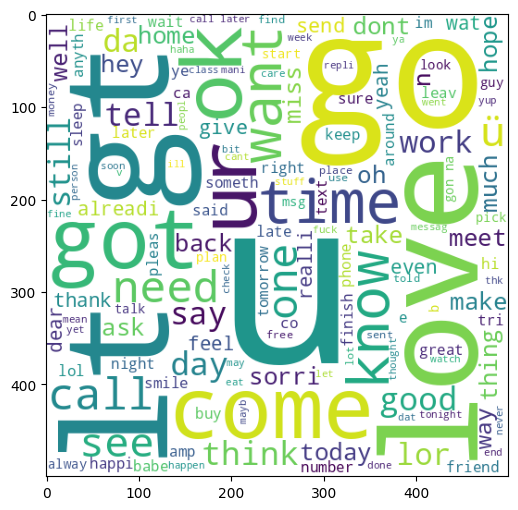

In [ ]:
ham_wc = wc.generate(messages[messages['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(messages['transformed_text']).toarray()

In [ ]:
y = messages['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb =  MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
try:
        mnb.predict(X_test)
except NotFittedError as e:
        print(repr(e))
y_pred2 = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))

Accuracy: 0.9721973094170404
Precision: 1.0
Recall: 0.8037974683544303
Confusion Matrix: [[957   0]
 [ 31 127]]
F1 Score: 0.8912280701754386


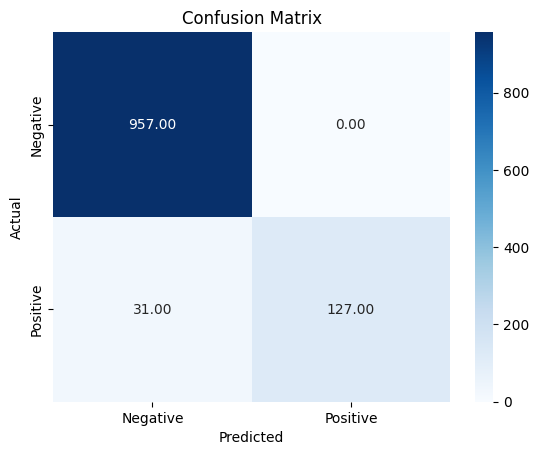

In [ ]:
import seaborn as sns
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred2)

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='Blues',fmt='.2f')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
import numpy as np
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# calculate misclassification rate
misclassification_rate = (cm[0][1] + cm[1][0]) / np.sum(cm)

# calculate error rate
error_rate = np.mean(y_pred2 != y_test)

# print the results
print("Misclassification Rate:", misclassification_rate)
print("Error Rate:", error_rate)

Misclassification Rate: 0.02780269058295964
Error Rate: 0.02780269058295964


In [ ]:
from sklearn.svm import SVC
# train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# make predictions on the testing set
y_pred = svm.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 0.9766816143497757
Precision: 0.9782608695652174
Recall: 0.8544303797468354
F1 Score: 0.9121621621621622
Confusion Matrix: [[954   3]
 [ 23 135]]


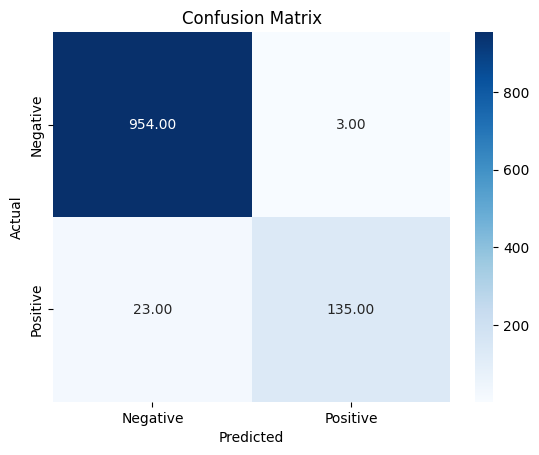

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='Blues',fmt='.2f')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
# calculate the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# calculate misclassification rate
misclassification_rate = (cm1[0][1] + cm1[1][0]) / np.sum(cm1)

# calculate error rate
error_rate = np.mean(y_pred != y_test)

# print the results
print("Misclassification Rate:", misclassification_rate)
print("Error Rate:", error_rate)

Misclassification Rate: 0.023318385650224215
Error Rate: 0.023318385650224215


In [ ]:
from sklearn.linear_model import LogisticRegression
# train a logistic regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# make predictions on the testing set
y_pred1 = lr.predict(X_test)

In [ ]:
# evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred1))

Accuracy: 0.957847533632287
Precision: 0.9911504424778761
Recall: 0.7088607594936709
F1 Score: 0.8265682656826568
Confusion Matrix: [[956   1]
 [ 46 112]]


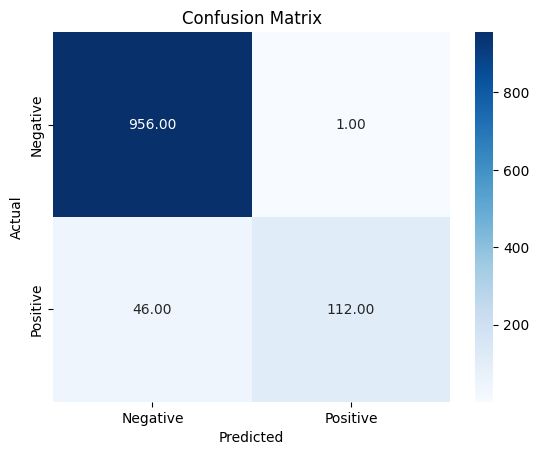

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred1)

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='Blues',fmt='.2f')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
# calculate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred1)

# calculate misclassification rate
misclassification_rate = (cm2[0][1] + cm2[1][0]) / np.sum(cm2)

# calculate error rate
error_rate = np.mean(y_pred1 != y_test)

# print the results
print("Misclassification Rate:", misclassification_rate)
print("Error Rate:", error_rate)

Misclassification Rate: 0.042152466367713005
Error Rate: 0.042152466367713005


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# make predictions on the testing set
y_pred4 = rf.predict(X_test)

In [ ]:
# evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))
print("Recall:", recall_score(y_test, y_pred4))
print("F1 Score:", f1_score(y_test, y_pred4))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred4))

Accuracy: 0.9739910313901345
Precision: 1.0
Recall: 0.8164556962025317
F1 Score: 0.8989547038327527
Confusion Matrix: [[957   0]
 [ 29 129]]


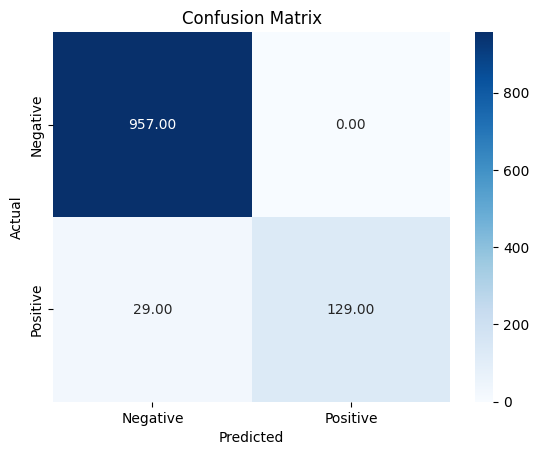

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred4)

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='Blues',fmt='.2f')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
# calculate the confusion matrix
cm3 = confusion_matrix(y_test, y_pred4)

# calculate misclassification rate
misclassification_rate = (cm3[0][1] + cm3[1][0]) / np.sum(cm3)

# calculate error rate
error_rate = np.mean(y_pred4 != y_test)

# print the results
print("Misclassification Rate:", misclassification_rate)
print("Error Rate:", error_rate)

Misclassification Rate: 0.02600896860986547
Error Rate: 0.02600896860986547


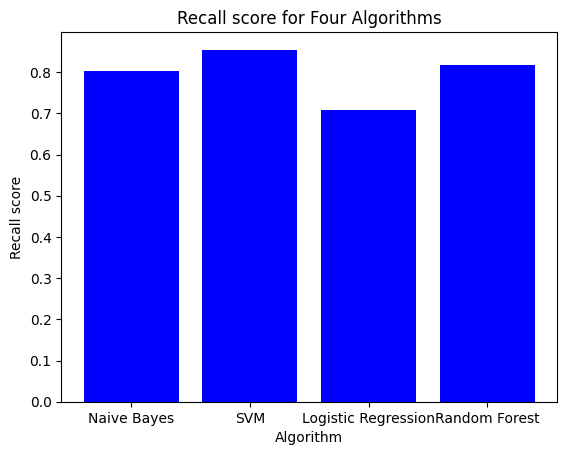

In [ ]:
# Precision scores for four algorithms
recall = [0.8037974683544303, 0.8544303797468354, 0.7088607594936709, 0.8164556962025317]

# Algorithm names
algorithms = ['Naive Bayes','SVM', 'Logistic Regression','Random Forest']

# Create a bar chart
plt.bar(algorithms, recall, color='blue')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Recall score')
plt.title('Recall score for Four Algorithms')

# Display the plot
plt.show()